In [ ]:
import gdown
import zipfile
import os

file_id = "1dviMhTU9olu_AkMsDMf3xY3QtRIw_m2v"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)

zip_path = "/content/ai2.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

print(f"압축 해제 완료")

os.chdir("/content/ai2/ch03")

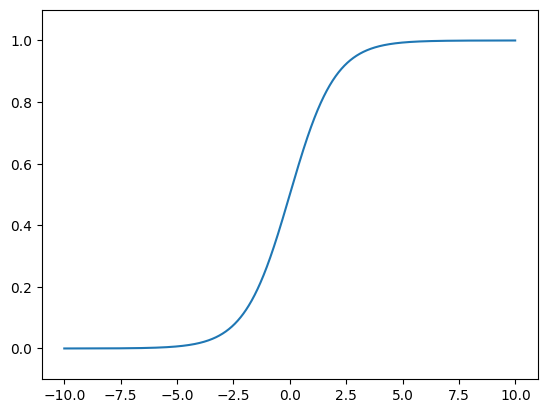

In [2]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-10.0, 10.0, 0.01)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

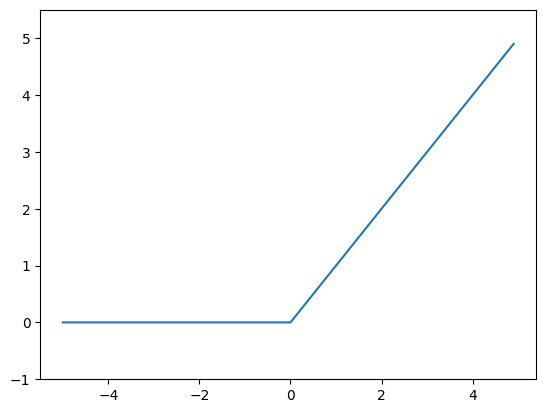

In [3]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

In [4]:
A = np.array([1, 2, 3, 4])
print(A)          # [1 2 3 4]
print(np.ndim(A)) # 1
print(A.shape)    # (4,)
print(A.shape[0]) # 4
print(len(A))     # 4

[1 2 3 4]
1
(4,)
4
4


In [5]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)            # [[1 2] [3 4] [5 6]]
print(np.ndim(B))   # 2
print(B.shape)      # (3, 2)
print(B.shape[0])   # 3
print(len(B))       # 3

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3
3


In [6]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

C = np.dot(A,B)  # (2,2)(2,2) => (2,2)
C.shape
print(C)

[[19 22]
 [43 50]]


In [7]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])

print(A.shape)
print(B.shape)
C = np.dot(A,B)
print(C.shape)
print(C)

(2, 3)
(3, 2)
(2, 2)
[[22 28]
 [49 64]]


#### 1차원 배열 끼리의 행렬 곱연산

In [8]:
A = np.array([1,2])
B = np.array([3,4])

print(np.sum(A*B))
print(np.dot(A,B))

11
11


In [9]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])

C = np.dot(A,B)
print(A.shape)
print(B.shape)
print(C.shape)
print(C)

(3, 2)
(2,)
(3,)
[23 53 83]


In [10]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([[7],[8]])

C = np.dot(A,B)
print(A.shape)
print(B.shape)
print(C.shape)
print(C)

(3, 2)
(2, 1)
(3, 1)
[[23]
 [53]
 [83]]


In [11]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8,9])

C = np.dot(B,A)  # (3,)(3,2)
# C = np.dot(A,B)  # (3,2)(3,)
print(C.shape)
print(C)

(2,)
[ 76 100]


In [12]:
A = np.array([[1,2],
              [3,4]])
B = np.array([[4,5],
              [6,7]])

C = np.dot(A,B)
print(C.shape)
print(C)

C = np.dot(B,A)
print(C.shape)
print(C)

(2, 2)
[[16 19]
 [36 43]]
(2, 2)
[[19 28]
 [27 40]]


In [13]:
X = np.array([1,2])
W = np.array([[1,3,5],
              [2,4,6]])

Y = np.dot(X,W)  # (2,)(2,3)
print(Y)

[ 5 11 17]


In [14]:
X = np.array([[1,2]])
W = np.array([[1,3,5], [2,4,6]])

Y = np.dot(X,W) # (1,2)(2,3) => (1,3)
print(Y)

[[ 5 11 17]]


### 1층 연산

In [19]:
X  = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1   # (2,)(2,3) + (3,) => (3,)
print(A1.shape)
print(A1)

(2,)
(2, 3)
(3,)
(3,)
[0.3 0.7 1.1]


### 1층의 활성화 함수

In [21]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 2층 연산

In [24]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.2],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2  # (3,)(3,2)+(2,) => (2,)
print(A2)
Z2 = sigmoid(A2)
print(Z2)
print(Z2.shape)

(3,)
(3, 2)
(2,)
[0.51615984 1.01357062]
[0.62624937 0.73371834]
(2,)


### 출력층 연산

In [26]:
def indentity_function(x):
    return x

W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
print(Z2.shape)
print(W3.shape)
print(B3.shape)

A3 = np.dot(Z2, W3) + B3    # (2,)(2,2)+(2,) => (2,)
Y = indentity_function(A3)
print(Y.shape)
print(Y)

(2,)
(2, 2)
(2,)
(2,)
[0.30936861 0.68136215]


### 구현 정리

In [27]:
def  init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.2], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    return network

def  forward( network, x ):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['B1'], network['B2'], network['B3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = indentity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward( network, x)
print(y)

[0.30936861 0.68136215]


### 소프트 맥스

In [31]:
import numpy as np
a = np.array([2.2, 1.1, -1.1])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)
print(np.sum(y))

[9.0250135  3.00416602 0.33287108]
12.362050607078636
[0.73005796 0.24301519 0.02692685]
0.9999999999999999


In [32]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([2.2, 1.1, -1.1])
y = softmax(a)
print(y)

[0.73005796 0.24301519 0.02692685]


### softmax 구현시 지수의 오버플로우 문제

In [36]:
np.exp(1000)

<ipython-input-36-47a6eab891c2>:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


np.float64(inf)

In [37]:
a = np.array([1010, 1000, 990])
y = softmax(a)
# y = a / np.sum(a)
print(y)

[nan nan nan]


<ipython-input-32-67c6a73bed27>:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-32-67c6a73bed27>:4: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


In [41]:
a = np.array([1010, 1000, 990])
c = np.max(a)
print(c)
print(a-c)

y = softmax(a-c)
print(y)
print(np.sum(y))

1010
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


In [42]:
a = np.array([10, 8, 6])
y = softmax(a)
print(y)

c = np.max(a)
print(a-c)

y = softmax(a-c)
print(y)

[0.86681333 0.11731043 0.01587624]
[ 0 -2 -4]
[0.86681333 0.11731043 0.01587624]


### 오버플로우 문제를 해결한 softmax()

In [43]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [44]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


In [45]:
a = np.array([1000, 1010, 990])
y = softmax(a)
print(y)
print(np.sum(y))

[4.53978686e-05 9.99954600e-01 2.06106005e-09]
1.0


### MNIST 데이터셋

In [50]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# print(x_train[0])
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


0
(784,)
(28, 28)


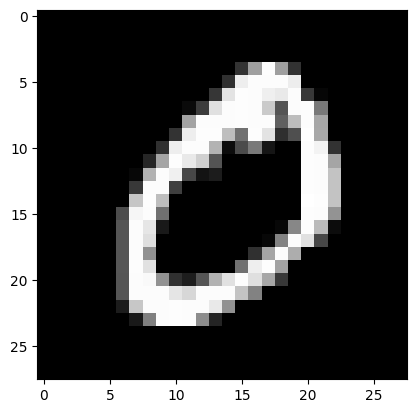

In [51]:
import matplotlib.pylab as plt
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[1]
label = t_train[1]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)
plt.imshow(img, cmap='gray')
# img_show(img)
plt.show()

### 파이썬 피클 사용법

In [60]:
import pickle

my_list = ['a', 'b', 'c']
print(my_list)
print(type(my_list))
# print(dir(my_list))

with open("data.pkl", 'wb') as fw:
    pickle.dump(my_list, fw)

my_list = None
print(my_list)

with open("data.pkl", 'rb') as fr:
    my_list = pickle.load(fr)

print(type(my_list))
print(my_list)

['a', 'b', 'c']
<class 'list'>
None
<class 'list'>
['a', 'b', 'c']


### 신경망의 추론 처리

In [67]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pylab as plt
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
# print(x.shape)     #(10000,  784)
# print(x[0])
# print(t.shape)   #(10000,)
network = init_network()
# print(type(network))
# print(network['W1'].shape)
# print(network['b1'].shape)
# print(network['W2'].shape)
# print(network['b2'].shape)
# print(network['W3'].shape)
# print(network['b3'].shape)
accuracy_cnt = 0
for i in range(len(x)):           # x.shape => (10000,784)
    y = predict(network, x[i])  # x[i].shape => (784,)
    # print(y.shape)   # y.shape => (10,)
    # print(y)
    # print(np.sum(y))
    # plt.imshow(x[i].reshape(28, 28), cmap='gray')

    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    # print(p)
    # print(t[i])
    # break

    if p == t[i]:
        accuracy_cnt += 1
    # else:
    #     print(p)
    #     print(t[i])
    #     plt.imshow(x[i].reshape(28, 28), cmap='gray')
    #     break


# # print(i)
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 배치 처리

In [68]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [69]:
for i in range(0, 100, 10):
    print(i)

0
10
20
30
40
50
60
70
80
90


In [74]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)  # (10, 10)

    return y


x, t = get_data()
network = init_network()

batch_size = 10 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):  # range(0,10000,10)
    x_batch = x[i:i+batch_size]
    # print(x_batch.shape)  # (10, 784)

    y_batch = predict(network, x_batch)
    # print(y_batch.shape)  # (10,10)

    p = np.argmax(y_batch, axis=1)
    # print(p)
    # print(t[i:i+batch_size])


    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    # print(accuracy_cnt)
#     if(i==0):
#         break

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [75]:
range(10)

range(0, 10)

In [76]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [77]:
list( range(0, 10 ))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [78]:
list( range(0, 100, 10 ))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

#### 배열 슬라이싱

In [79]:
a = np.array([1,2,3,4,5])
print(a)
print(a.shape)
print(a[0])
print(a[0].shape)
print(type(a[0]))
print(a[0:1])
print(a[0:1].shape)
print(type(a[0:1]))

[1 2 3 4 5]
(5,)
1
()
<class 'numpy.int64'>
[1]
(1,)
<class 'numpy.ndarray'>


In [80]:
x = np.array([[0.1, 0.7, 0.2],
              [0.9, 0.1, 0.0],
              [0.1, 0.8, 1.0],
              [0.7, 0.1, 0.2]])
y = np.argmax(x, axis=1)
print(y)

[1 0 2 0]


In [83]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)
np.mean(y==t)

[ True  True False  True]


np.float64(0.75)